<a href="https://colab.research.google.com/github/uzairazmat/Linear-Regression/blob/main/2_House_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

    In this project I use california housing data set available on kaagle first I preform
    
    
    EDA on data and second step is to create predicting model using linear regression and predict
    
    
    house price on various features

# Download data set from link given below


[california housing data set download link ](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)


#Description of data
**Context**
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

**Content**
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housing_median_age

total_rooms

total_bedrooms

population

households

median_income

median_house_value

ocean_proximity



#Objective : Predict house prices based on various features like location, size, number of bedrooms, etc

# Outcome: A model that can predict house prices for given input features

In [1]:
import pandas as pd  #data manipulation library , data processing
import numpy as np #numerical library , linear algebra
import matplotlib as plt # data visulization library , using for plots
import matplotlib.pyplot as plt
import seaborn as sns # data visulization library , works on matplotlib for better visulization

In [4]:
path = "housing.csv"   #save (file_path) of data into path vatiable

In [5]:
data  =  pd.read_csv(path)    #create data pandas data frame

#1. Data Exploration

#1.1 Check the shape of your data

In [6]:
data.shape  #check the row and col of your data

(20640, 10)

#1.2 First 5 rows of your data frame

In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 1.3 Last 5 rows of your data frame

In [8]:
data.tail()  #last 5 rows of our data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


#1.4 All info of data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#Note! you can see total_bedrooms  have missing values and ocean_proximity  has object data type

# 1.4 check values of ocean_proximity

In [10]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

``` check island feature is so unique ```

#1.5 All statistics of data

In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 2.Visulization

#Univarite analysis

##longitud

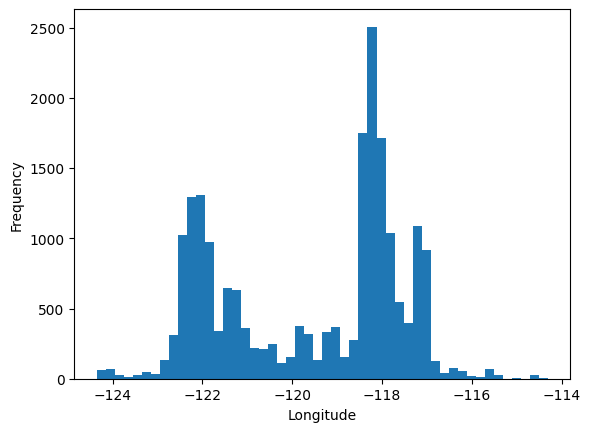

In [12]:
plt.hist(data["longitude"],bins = 50)
plt.xlabel("Longitude")
plt.ylabel("Frequency")
plt.show()

#latitude

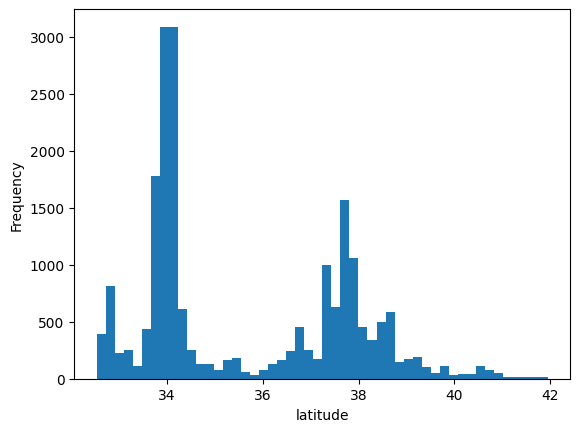

In [13]:
plt.hist(data["latitude"],bins = 50)
plt.xlabel("latitude")
plt.ylabel("Frequency")
plt.show()

#housing_median_age

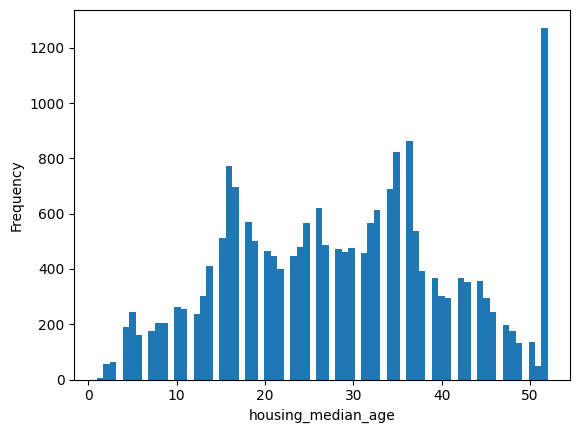

In [14]:
plt.hist(data["housing_median_age"],bins = 70)
plt.xlabel("housing_median_age")
plt.ylabel("Frequency")
plt.show()

#total_rooms

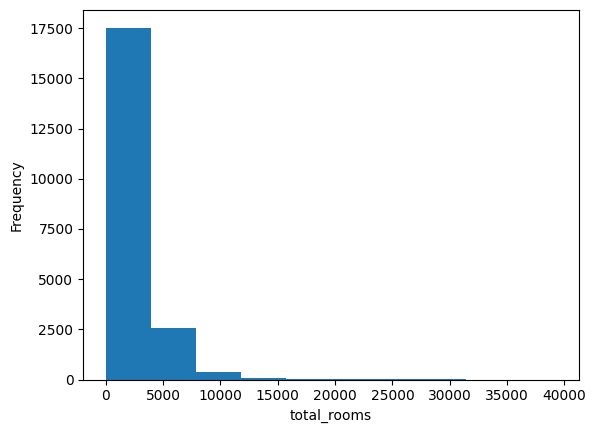

In [15]:
plt.hist(data["total_rooms"],bins = 10)
plt.xlabel("total_rooms")
plt.ylabel("Frequency")
plt.show()

#total_bedrooms

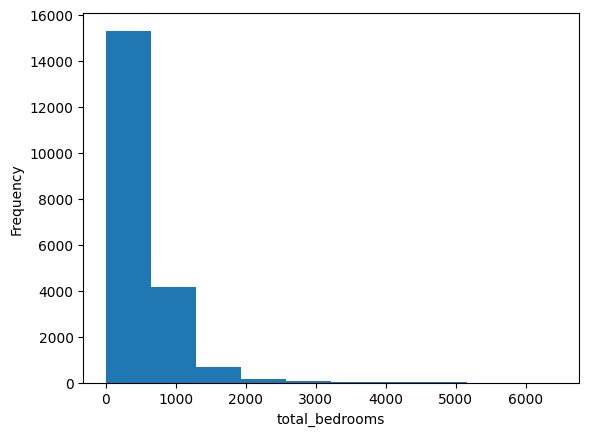

In [16]:
plt.hist(data["total_bedrooms"],bins = 10)
plt.xlabel("total_bedrooms")
plt.ylabel("Frequency")
plt.show()

#Population

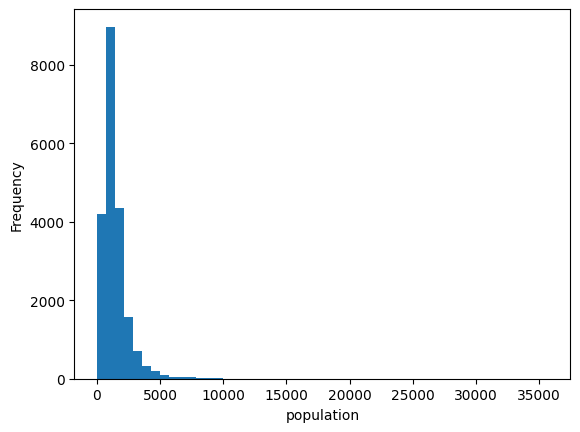

In [17]:
plt.hist(data["population"],bins = 50)
plt.xlabel("population")
plt.ylabel("Frequency")
plt.show()

#Households

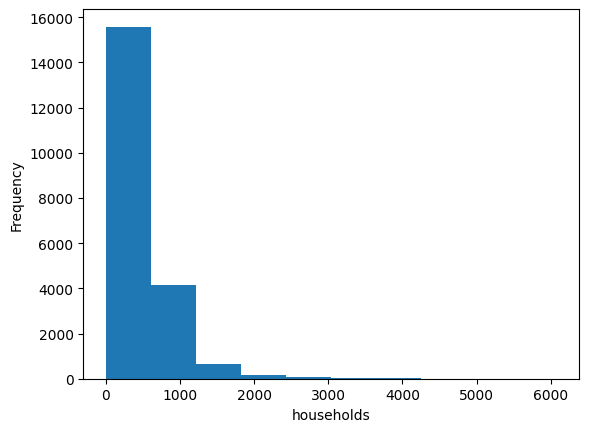

In [18]:
plt.hist(data["households"],bins = 10)
plt.xlabel("households")
plt.ylabel("Frequency")
plt.show()

#median_income

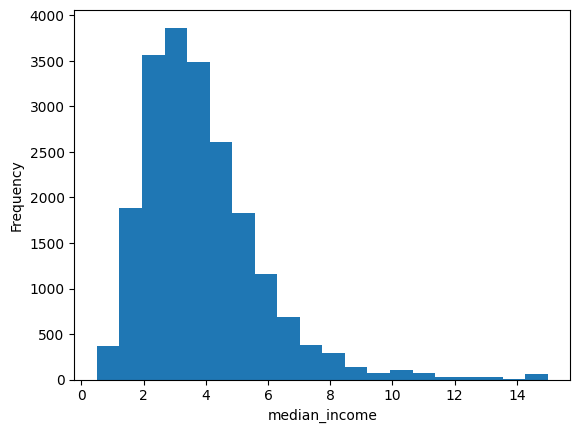

In [19]:
plt.hist(data["median_income"],bins = 20)
plt.xlabel("median_income")
plt.ylabel("Frequency")
plt.show()

#median_house_value

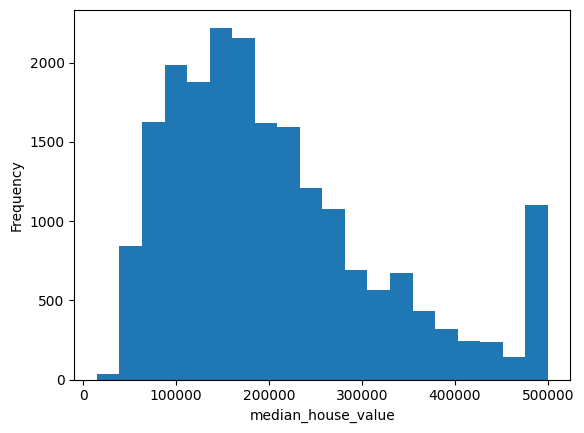

In [20]:
plt.hist(data["median_house_value"],bins = 20)
plt.xlabel("median_house_value")
plt.ylabel("Frequency")
plt.show()


# Bivariate analysis

## Plot of longitude and latitude

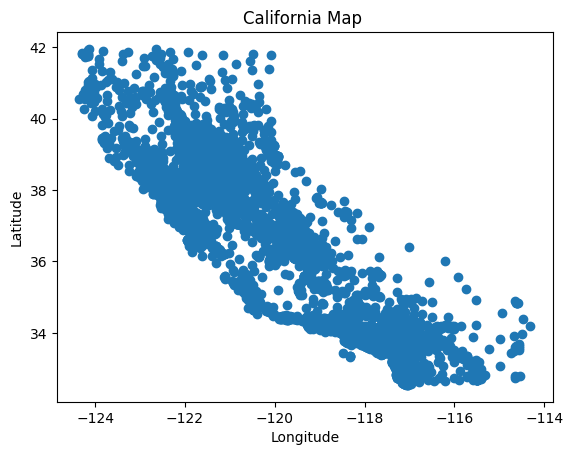

In [21]:
plt.scatter(x=data["longitude"] , y=data["latitude"] )  #fetch latitude and longitude
plt.xlabel("Longitude")  #set x label is longitude
plt.ylabel("Latitude") #set y label is latitude
plt.title("California Map ")
plt.show()
#you can see this is the represtentaion of every district in california and you also
#Notice that one of ecah ovelaid on top of each other

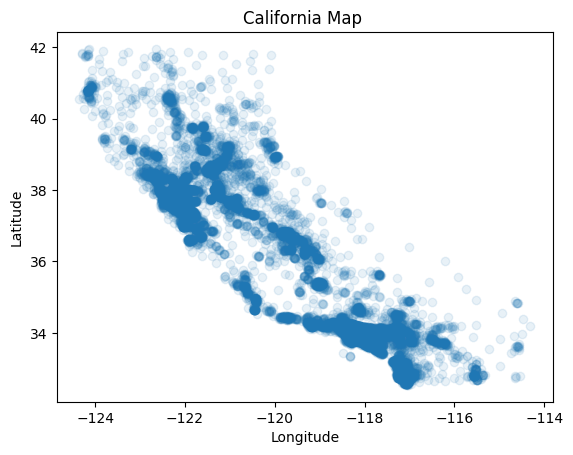

In [22]:
plt.scatter(x=data["longitude"] , y=data["latitude"], alpha = 0.1 )  #fetch latitude and longitude
#I add alpha 0.1 so you can see which one is overlaid is prominent and have more observations


plt.xlabel("Longitude")  #set x label is longitude
plt.ylabel("Latitude") #set y label is latitude
plt.title("California Map ")
plt.show()

# My Rational
   
    1. House value is directly propotional to population in a district

    2. Less latitude and less longitude is the ocian side so must have higher house value

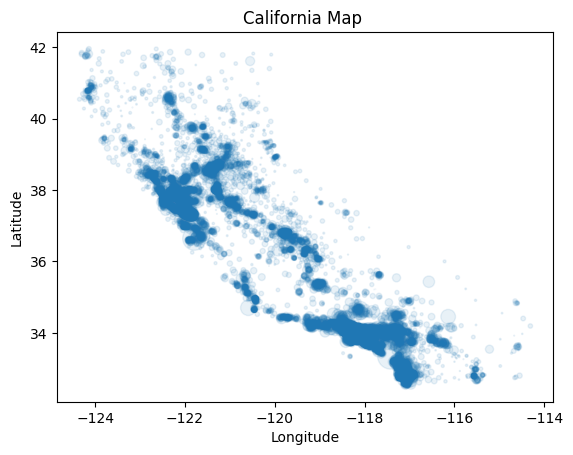

In [23]:
plt.scatter(x=data["longitude"] , y=data["latitude"], alpha = 0.1 ,
            s = data["population"]/100 ,label = "population")  #fetch latitude and longitude
#I add alpha 0.1 so you can see which one is overlaid is prominent and have more observations
#make the dot acccording to population i divide 100 b/c of size


plt.xlabel("Longitude")  #set x label is longitude
plt.ylabel("Latitude") #set y label is latitude
plt.title("California Map ")
plt.show()

<ipython-input-24-aa4507ec84cd>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=data["longitude"] , y=data["latitude"], alpha = 0.1 ,


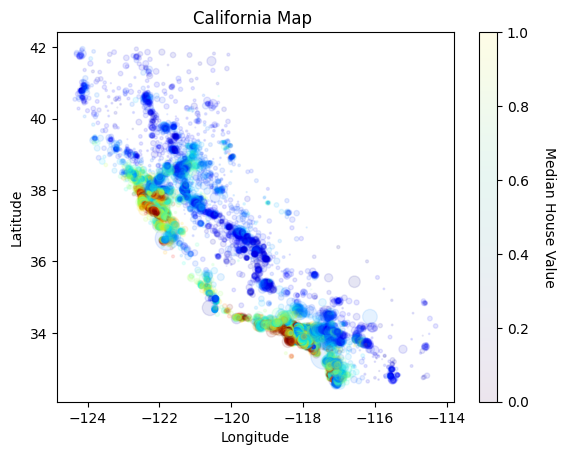

In [24]:
# Normalize median_house_value for color mapping
import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=data["median_house_value"].min(), vmax=data["median_house_value"].max())
colors = plt.cm.jet(norm(data["median_house_value"]))


plt.scatter(x=data["longitude"] , y=data["latitude"], alpha = 0.1 ,
            s = data["population"]/100 ,label = "population",
            c = colors ,cmap=plt.get_cmap("plasma"))  #fetch latitude and longitude
#I add alpha 0.1 so you can see which one is overlaid is prominent and have more observations
#make the dot acccording to population i divide 100 b/c of size


# Add colorbar with label
cbar = plt.colorbar(label='Median House Value')
cbar.set_label('Median House Value', rotation=270, labelpad=20)





plt.xlabel("Longitude")  #set x label is longitude
plt.ylabel("Latitude") #set y label is latitude
plt.title("California Map ")
plt.show()

# 3 Corelations

    corelation show how closely two variables related are


    1.corelation 1 shows that they are exactly the same

    2.corelation -1 show they exactly the opposite

    3.corelation 0 means there is no relation between two variales


In [25]:
data.corr()

ValueError: could not convert string to float: 'NEAR BAY'

In [30]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [31]:
d2 = data.drop(["ocean_proximity"],axis = 1)
d2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [32]:
corr_matrix =  d2.corr()

In [33]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# Data Cleaning

##4.1 you notice that in our data set total_bedrooms features has some missing values so there are two option to deal with it

1. you delete all observation of total_bedrooms

    but this is not optimal solution you lost alot of data by deleting complete total_bedrooms feature

2. you delete all observation regarding where total_bedrooms have missing values

    so in this way you may loss 200 observations and keep your total_bedrooms feature

In [34]:
data.shape #check the shape of data

(20640, 10)

In [35]:
data[data["total_bedrooms"].isnull()] #calculate how many null values in total_bebdrooms feature

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [36]:
data_na = data.dropna(subset=["total_bedrooms"]) #drop all observation where total_bedrooms value is Null

In [37]:
data_na.shape #check the shape of data

(20433, 10)

In [38]:
data_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# 4.2 Deal with categorical data

In [39]:
# Convert categorical column into dummy variables (0s and 1s)
dummy_data = pd.get_dummies(data_na["ocean_proximity"])

In [40]:
# Concatenate the dummy variables with the original DataFrame
data_with_dummies = pd.concat([data_na, dummy_data], axis=1)

In [41]:
data_with_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,False,True,False,False,False


In [42]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
 10  <1H OCEAN           20433 non-null  bool   
 11  INLAND              20433 non-null  bool   
 12  ISLAND              20433 non-null  bool   
 13  NEAR BAY            20433 non-null  bool   
 14  NEAR OCEAN          20433 non-null  bool   
dtypes: bool(5), float64(9), object(1)
memory usage: 1.8+ MB


#4.3 Drop 2 fearures ocean_proximity , Island

In [43]:
#Drop 2 fearures ocean_proximity , Island
final_data = data_with_dummies.drop(["ocean_proximity","ISLAND"] , axis = 1)
final_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False


# 5.Implement Linear regression

Here we have to create **two** data sets 1 for features and 2 for label


# 5.1 Split data set into Features and label

In [44]:
#create data set from origional data set except median_house_value
X = final_data.drop(["median_house_value"],axis = 1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [45]:
#crete label data
y = final_data["median_house_value"]
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

#5.2 Split data into test and training model

In [46]:
#import train_test_split
from sklearn.model_selection import train_test_split

#split data into train and test
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=1984)

#5.3 Import ols linear regression

In [47]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

#5.4 create fit line

In [48]:
ols.fit(X_train, y_train)

LinearRegression()

# 5.5 bassic info of model

In [49]:
#display y-intercept,cofficient and Score of ols model
print("Cofficient of ols model is " , str(ols.coef_),"\n")

print("intercept of ols model is " , str(ols.intercept_),"\n")

print("R-Squared value of ols is", str(ols.score(X_train,y_train)))

Cofficient of ols model is  [-2.72191872e+04 -2.61224400e+04  1.03631750e+03 -6.39771322e+00
  9.97707401e+01 -3.73545857e+01  4.99035484e+01  3.93656164e+04
 -1.49036788e+05 -1.87787533e+05 -1.51883617e+05 -1.45673607e+05] 

intercept of ols model is  -2146719.4958721935 

R-Squared value of ols is 0.6433902949192565


#5.6 Predicting with ols

In [50]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
15175,-117.07,33.03,15.0,1095.0,158.0,361.0,176.0,6.8099,True,False,False,False
15424,-117.27,33.20,34.0,1852.0,322.0,978.0,332.0,4.3542,True,False,False,False
16212,-121.32,37.96,47.0,1700.0,344.0,922.0,357.0,3.1845,False,True,False,False
15356,-117.34,33.23,11.0,3737.0,757.0,2212.0,727.0,3.1062,False,False,False,True
1899,-120.01,38.89,24.0,1669.0,422.0,589.0,281.0,3.0089,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1128,-121.61,39.76,31.0,2431.0,512.0,1026.0,427.0,2.5428,False,True,False,False
17472,-119.85,34.48,23.0,1915.0,277.0,724.0,267.0,6.2987,False,False,False,True
20564,-121.71,38.72,32.0,710.0,155.0,550.0,154.0,2.8882,False,True,False,False
3531,-118.54,34.27,28.0,2309.0,300.0,931.0,302.0,6.7415,True,False,False,False


In [51]:
y_test

15175    328200.0
15424    156900.0
16212     87200.0
15356    141000.0
1899     100800.0
           ...   
1128      85000.0
17472    348200.0
20564    151400.0
3531     348200.0
3753     222400.0
Name: median_house_value, Length: 4087, dtype: float64

#5.7 New data that can contain Perfomance that predicted value by ols and Actual value


In [64]:
y_pred = ols.predict(X_test)
performance = pd.DataFrame({"Prediction": y_pred, "Actual Value": y_test.values})
performance["error"] = performance["Actual Value"] - performance["Prediction"]
performance.reset_index(inplace=True)

In [65]:
performance

,index,Prediction,Actual Value,error
0,0,315646.738470,328200.0,12553.261530
1,1,235926.156196,156900.0,-79026.156196
2,2,157003.325611,87200.0,-69803.325611
3,3,172404.340246,141000.0,-31404.340246
4,4,82931.270634,100800.0,17868.729366
...,...,...,...,...
4082,4082,87727.629292,85000.0,-2727.629292
4083,4083,342576.659900,348200.0,5623.340100
4084,4084,111799.511301,151400.0,39600.488699
4085,4085,325442.991899,348200.0,22757.008101


#5.8 OLS Model Performence

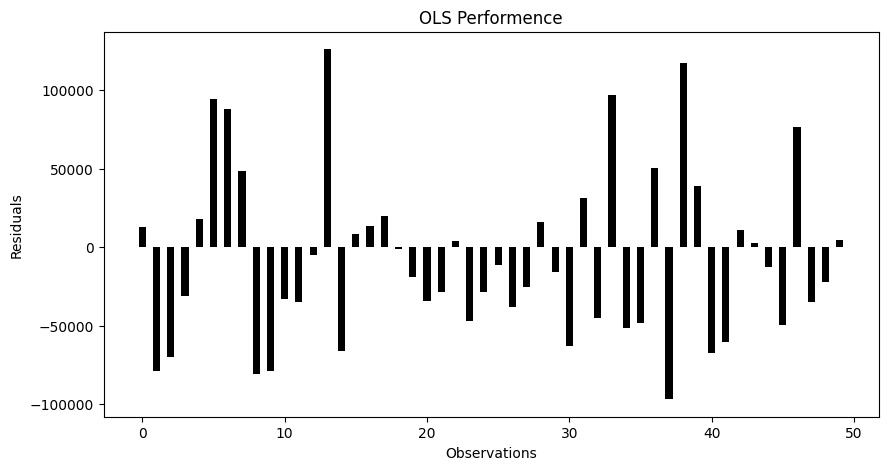

In [74]:
fig = plt.figure(figsize=(10,5))
plt.bar("index","error",data = performance[:50],color ="black",width= 0.5)
plt.xlabel("Observations")
plt.ylabel("Residuals")
plt.title("OLS Performence")
plt.show()